<a href="https://colab.research.google.com/github/Rahul082002/Optimization-of-Enzymatic-Reactions-Using-Quadratic-Response-Surface-Methodology-RSM-/blob/main/RSM_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Improvements I am thinking of:
1. As r2  and adjusted r2 has significant difference, we should use FEATURE SELECTION techniques for more generalised model (but first we have to have a lot of features)

In [2]:
df= pd.read_csv(r"/content/enzyme_data.csv")

In [3]:
df

,Temperature(◦C),Enzyme[mg/ml),Initial Molar Ratio(Acid: Alcohol),Time(h),Yield(%),Name of enzyme
0,45,3.5,2.0,3.0,93.30,lipase from C rugosa
1,70,3.5,2.0,0.5,29.30,lipase from C rugosa
2,45,3.5,3.5,5.5,88.10,lipase from C rugosa
3,20,0.5,2.0,3.0,11.03,lipase from C rugosa
4,45,3.5,0.5,0.5,45.60,lipase from C rugosa
5,45,6.5,3.5,3.0,87.30,lipase from C rugosa
6,45,3.5,3.5,0.5,27.50,lipase from C rugosa
7,70,3.5,0.5,3.0,33.61,lipase from C rugosa
8,20,3.5,0.5,3.0,69.57,lipase from C rugosa
9,45,3.5,2.0,3.0,91.10,lipase from C rugosa


In [4]:
df['Name of enzyme'].value_counts()
## thus can delete this

,count
Name of enzyme,
lipase from C rugosa,29


In [5]:
df.drop(columns=['Name of enzyme'], inplace = True)

<Figure size 800x800 with 0 Axes>

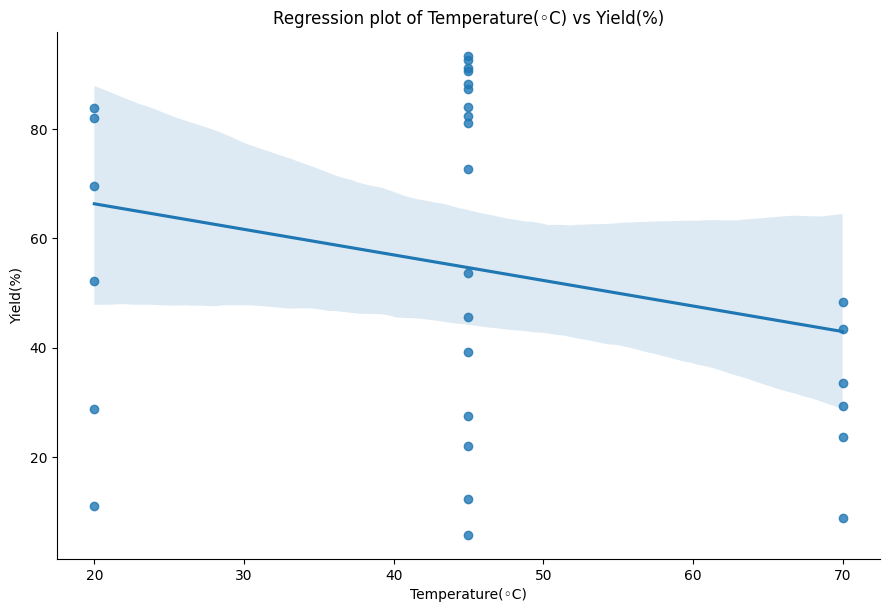

<Figure size 800x800 with 0 Axes>

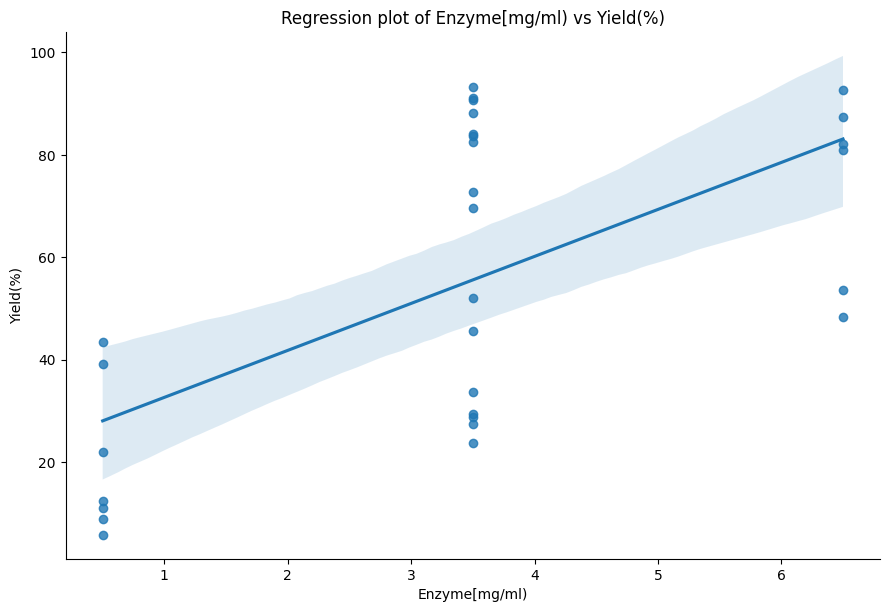

<Figure size 800x800 with 0 Axes>

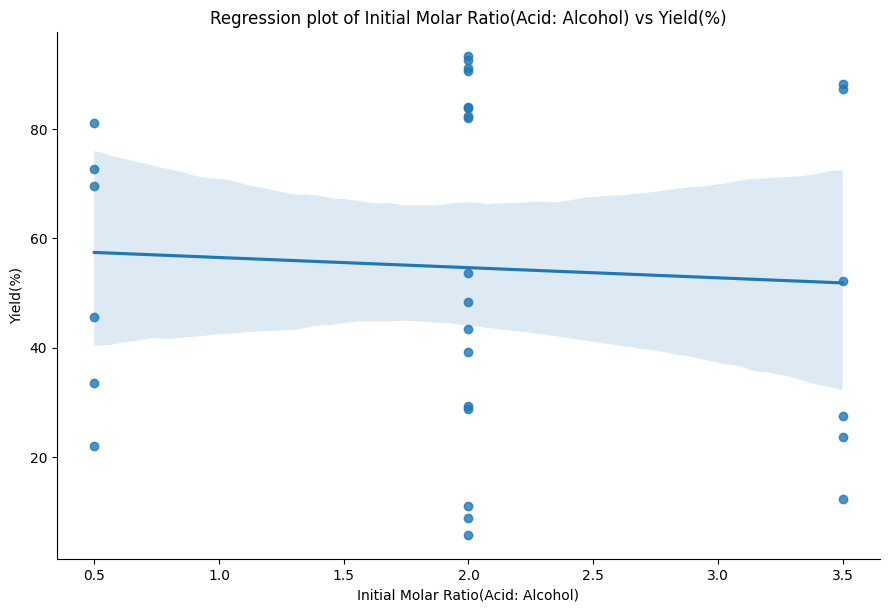

<Figure size 800x800 with 0 Axes>

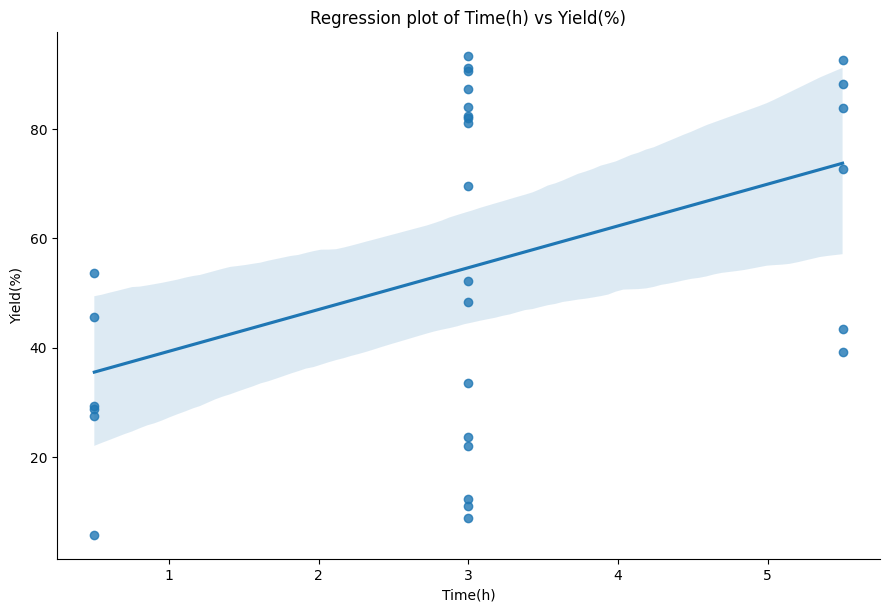

In [6]:
variables = ['Temperature(◦C)',	'Enzyme[mg/ml)','Initial Molar Ratio(Acid: Alcohol)','Time(h)']
for var in variables:
    plt.figure(figsize=(8,8))
    sns.lmplot(x=var, y='Yield(%)', data=df, height=6, aspect=1.5)
    plt.title(f'Regression plot of {var} vs Yield(%)')
    plt.xlabel(var)
    plt.ylabel('Yield(%)')
    plt.show()

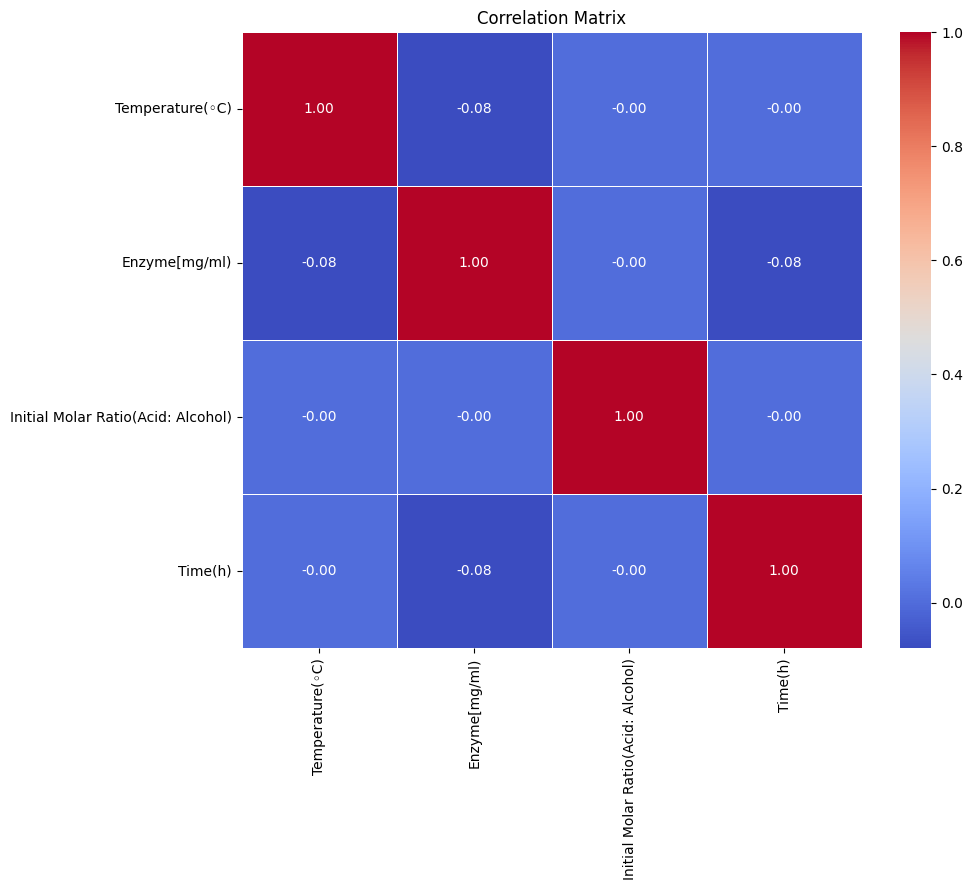

In [7]:
correlation_matrix = df[variables].corr()
# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [8]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 5.3 MB/s eta 0:00:00


In [9]:
from scipy.stats import normaltest
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pingouin as pg

In [10]:
def check_multivariate_normality(df):
    results = {}

    # Perform multivariate normality test using pingouin
    mvn_test = pg.multivariate_normality(df)
    results['MVN Test'] = mvn_test

    # Check for multicollinearity using VIF
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    results['VIF'] = vif_data

    # Evaluate sample size
    n_samples, n_features = df.shape
    results['Sample Size'] = n_samples
    results['Number of Features'] = n_features
    results['Sufficient Sample Size'] = n_samples >= n_features * 5

    # Print the results
    print("Multivariate Normality Test results:")
    print(mvn_test)
    print(f"Variance Inflation Factor (VIF):\n{vif_data}")
    print(f"Sample Size: {n_samples}, Number of Features: {n_features}")
    if results['Sufficient Sample Size']:
        print("Sample size is sufficient.")
    else:
        print("Warning: Sample size may be too small for reliable estimation of covariance matrix.")

    return results

In [11]:
check_multivariate_normality(df[variables])

Multivariate Normality Test results:
HZResults(hz=0.4700617639779852, pval=0.997475553803244, normal=True)
Variance Inflation Factor (VIF):
                              feature       VIF
0                     Temperature(◦C)  5.176776
1                       Enzyme[mg/ml)  3.107445
2  Initial Molar Ratio(Acid: Alcohol)  4.209387
3                             Time(h)  3.624395
Sample Size: 29, Number of Features: 4
Sample size is sufficient.


{'MVN Test': HZResults(hz=0.4700617639779852, pval=0.997475553803244, normal=True),
 'VIF':                               feature       VIF
 0                     Temperature(◦C)  5.176776
 1                       Enzyme[mg/ml)  3.107445
 2  Initial Molar Ratio(Acid: Alcohol)  4.209387
 3                             Time(h)  3.624395,
 'Sample Size': 29,
 'Number of Features': 4,
 'Sufficient Sample Size': True}

# This data is a Muultivariate NORMAL data

R² for Temperature(◦C) with degree 1: 0.0644
R² for Temperature(◦C) with degree 2: 0.1753
R² for Temperature(◦C) with degree 3: 0.1753
R² for Temperature(◦C) with degree 4: 0.1753
R² for Temperature(◦C) with degree 5: 0.1753
Best R² for Temperature(◦C) is 0.1753 with degree 3
R² for Temperature(◦C) with degree 3: 0.1753


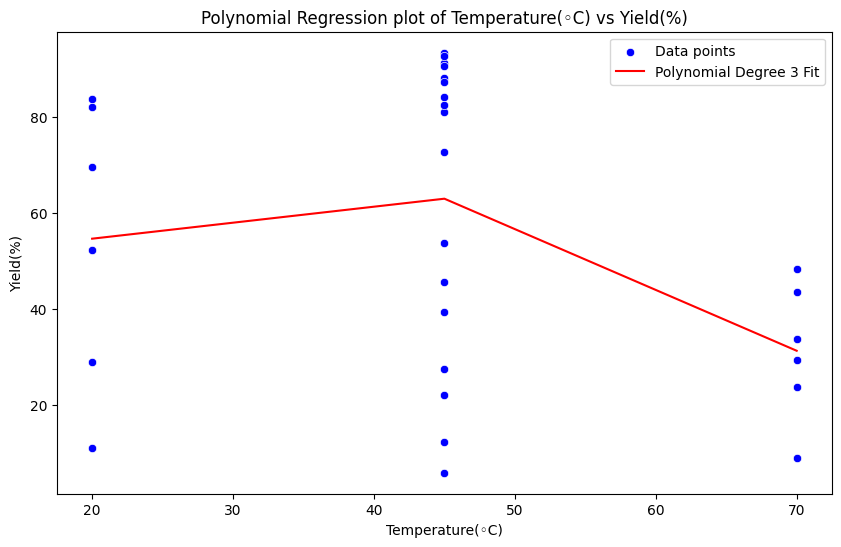

Temperature(◦C) value at which the predicted yield is highest: 41.84 with a predicted yield of 63.18
R² for Enzyme[mg/ml) with degree 1: 0.3867
R² for Enzyme[mg/ml) with degree 2: 0.4501
R² for Enzyme[mg/ml) with degree 3: 0.4501
R² for Enzyme[mg/ml) with degree 4: 0.4501
R² for Enzyme[mg/ml) with degree 5: 0.4501
Best R² for Enzyme[mg/ml) is 0.4501 with degree 2
R² for Enzyme[mg/ml) with degree 2: 0.4501


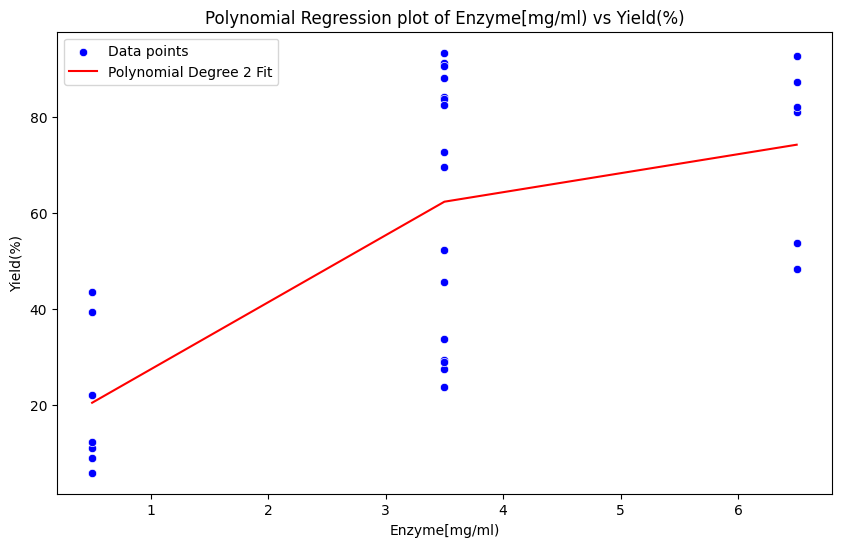

Enzyme[mg/ml) value at which the predicted yield is highest: 6.19 with a predicted yield of 74.30
R² for Initial Molar Ratio(Acid: Alcohol) with degree 1: 0.0037
R² for Initial Molar Ratio(Acid: Alcohol) with degree 2: 0.0125
R² for Initial Molar Ratio(Acid: Alcohol) with degree 3: 0.0125
R² for Initial Molar Ratio(Acid: Alcohol) with degree 4: 0.0125
R² for Initial Molar Ratio(Acid: Alcohol) with degree 5: 0.0125
Best R² for Initial Molar Ratio(Acid: Alcohol) is 0.0125 with degree 4
R² for Initial Molar Ratio(Acid: Alcohol) with degree 4: 0.0125


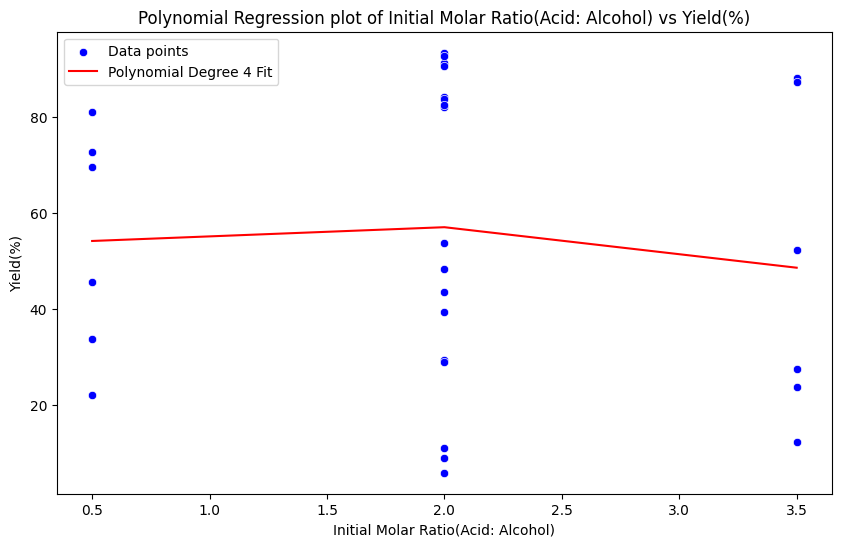

Initial Molar Ratio(Acid: Alcohol) value at which the predicted yield is highest: 2.26 with a predicted yield of 57.13
R² for Time(h) with degree 1: 0.1722
R² for Time(h) with degree 2: 0.1835
R² for Time(h) with degree 3: 0.1835
R² for Time(h) with degree 4: 0.1835
R² for Time(h) with degree 5: 0.1835
Best R² for Time(h) is 0.1835 with degree 2
R² for Time(h) with degree 2: 0.1835


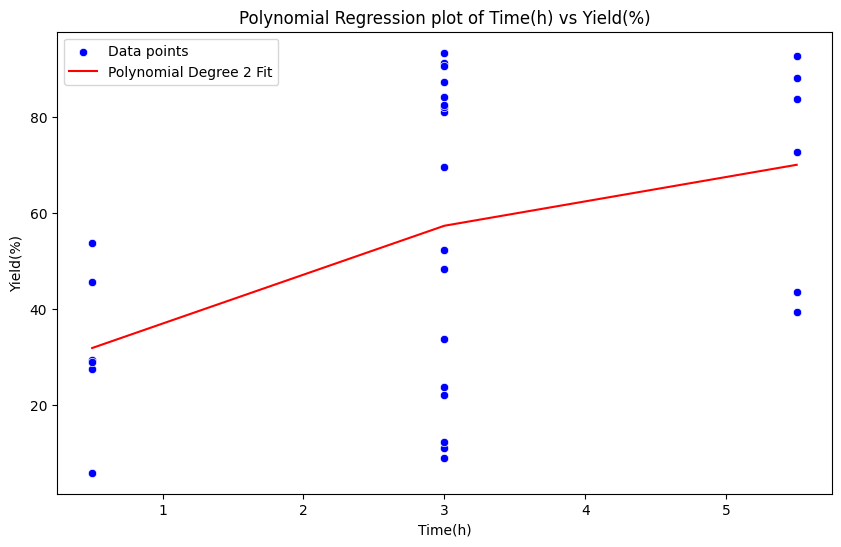

Time(h) value at which the predicted yield is highest: 5.50 with a predicted yield of 69.95


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

# Generic function to fit and plot polynomial regression
def plot_polynomial_regression(df, feature, target, degree=2):
    X = df[[feature]].values
    y = df[target].values

    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)

    # Calculate R² value
    r2 = r2_score(y, y_poly_pred)
    print(f'R² for {feature} with degree {degree}: {r2:.4f}')

    # Sort the values for plotting
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(X, y_poly_pred), key=sort_axis)
    X_sorted, y_poly_pred_sorted = zip(*sorted_zip)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y=target, data=df, color='blue', label='Data points')
    plt.plot(X_sorted, y_poly_pred_sorted, color='red', label=f'Polynomial Degree {degree} Fit')
    plt.title(f'Polynomial Regression plot of {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.legend()
    plt.show()

    # Calculate the feature value with the highest predicted yield
    # Create a range of feature values for prediction
    feature_range = np.linspace(df[feature].min(), df[feature].max(), 500).reshape(-1, 1)
    feature_range_poly = poly.transform(feature_range)
    feature_range_yield = model.predict(feature_range_poly)

    # Find the feature value corresponding to the maximum predicted yield
    max_yield_idx = np.argmax(feature_range_yield)
    max_yield_value = feature_range_yield[max_yield_idx]
    max_feature_value = feature_range[max_yield_idx][0]
    print(f'{feature} value at which the predicted yield is highest: {max_feature_value:.2f} with a predicted yield of {max_yield_value:.2f}')

# Generic function to perform degree tuning and plot the best model
def tune_polynomial_degree(df, feature, target, max_degree=5):
    best_r2 = -float('inf')
    best_degree = 0

    for degree in range(1, max_degree + 1):
        X = df[[feature]].values
        y = df[target].values

        # Generate polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        # Fit the model
        model = LinearRegression()
        model.fit(X_poly, y)
        y_poly_pred = model.predict(X_poly)

        # Calculate R² value
        r2 = r2_score(y, y_poly_pred)
        print(f'R² for {feature} with degree {degree}: {r2:.4f}')

        if r2 > best_r2:
            best_r2 = r2
            best_degree = degree

    print(f'Best R² for {feature} is {best_r2:.4f} with degree {best_degree}')
    plot_polynomial_regression(df, feature, target, degree=best_degree)

# Example usage for tuning
features =['Temperature(◦C)',	'Enzyme[mg/ml)','Initial Molar Ratio(Acid: Alcohol)','Time(h)']
target = 'Yield(%)'

# Example: Tune polynomial degree for each feature
for feature in features:
    tune_polynomial_degree(df, feature, target, max_degree=5)


In [13]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Function to fit and predict using multivariate polynomial regression
def fit_polynomial_model(df, features, target, degree):
    X = df[features].values
    y = df[target].values

    # Scale features
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)

    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)

    # Calculate R² value
    r2 = r2_score(y, y_poly_pred)
    print(f'R² for multivariate polynomial regression with degree {degree} and features {features}: {r2:.4f}')

    return model, poly, scaler, r2

# Function to calculate IQR ranges for each feature, ensuring all values are positive
def calculate_iqr_ranges(df, features):
    ranges = {}
    for feature in features:
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        iqr = q3 - q1
        min_range = max(0, q1 - 1.5 * iqr)  # Ensure minimum is non-negative
        max_range = q3 + 1.5 * iqr
        ranges[feature] = (min_range, max_range)
    return ranges

# Function to predict highest yield using the model within IQR range
def predict_highest_yield(df, features, model, poly, scaler):
    # Calculate IQR ranges for each feature
    iqr_ranges = calculate_iqr_ranges(df, features)

    # Create a range of values within the IQR range for each feature
    feature_ranges = {}
    for feature, (min_val, max_val) in iqr_ranges.items():
        if feature == 'Time(hr)':  # Enforce constraint that Time >= 1
            feature_ranges[feature] = np.linspace(max(1, min_val), max_val, 50)
        else:
            feature_ranges[feature] = np.linspace(min_val, max_val, 50)

    # Create a grid of values for all features
    mesh = np.meshgrid(*feature_ranges.values(), indexing='ij')
    grid_points = np.vstack([x.ravel() for x in mesh]).T

    # Ensure all grid points are non-negative
    grid_points = np.clip(grid_points, 0, None)

    # Scale the grid points
    grid_scaled = scaler.transform(grid_points)

    # Generate polynomial features
    grid_poly = poly.transform(grid_scaled)

    # Predict yields for all grid points
    y_pred = model.predict(grid_poly)

    # Find the index of the maximum yield
    max_index = np.argmax(y_pred)
    highest_yield = y_pred[max_index]
    best_feature_values = grid_points[max_index]

    print(f'Highest predicted yield: {highest_yield:.4f}')
    print(f'Feature values for highest yield:')
    for feature, value in zip(features, best_feature_values):
        print(f'{feature}: {value:.4f}')

    return highest_yield, dict(zip(features, best_feature_values))

# Function to tune polynomial degree and find the best one
def tune_polynomial_degree(df, features, target, max_degree=6):
    best_r2 = -float('inf')
    best_degree = 0
    best_model = None
    best_poly = None
    best_scaler = None

    for degree in range(1, max_degree + 1):
        print(f'Evaluating polynomial degree {degree}')
        model, poly, scaler, r2 = fit_polynomial_model(df, features, target, degree)

        if r2 > best_r2:
            best_r2 = r2
            best_degree = degree
            best_model = model
            best_poly = poly
            best_scaler = scaler

    print(f'Best R² of {best_r2:.4f} achieved with polynomial degree {best_degree}')
    return best_degree, best_model, best_poly, best_scaler

# Example usage
features =['Temperature(◦C)',	'Enzyme[mg/ml)','Initial Molar Ratio(Acid: Alcohol)','Time(h)']
target = 'Yield(%)'


# Tune polynomial degree
best_degree, best_model, best_poly, best_scaler = tune_polynomial_degree(df, features, target, max_degree=6)

# Predict the highest yield and corresponding feature values
highest_yield, best_feature_values = predict_highest_yield(df, features, best_model, best_poly, best_scaler)


Evaluating polynomial degree 1
R² for multivariate polynomial regression with degree 1 and features ['Temperature(◦C)', 'Enzyme[mg/ml)', 'Initial Molar Ratio(Acid: Alcohol)', 'Time(h)']: 0.6485
Evaluating polynomial degree 2
R² for multivariate polynomial regression with degree 2 and features ['Temperature(◦C)', 'Enzyme[mg/ml)', 'Initial Molar Ratio(Acid: Alcohol)', 'Time(h)']: 0.9490
Evaluating polynomial degree 3
R² for multivariate polynomial regression with degree 3 and features ['Temperature(◦C)', 'Enzyme[mg/ml)', 'Initial Molar Ratio(Acid: Alcohol)', 'Time(h)']: 0.9959
Evaluating polynomial degree 4
R² for multivariate polynomial regression with degree 4 and features ['Temperature(◦C)', 'Enzyme[mg/ml)', 'Initial Molar Ratio(Acid: Alcohol)', 'Time(h)']: 0.9964
Evaluating polynomial degree 5
R² for multivariate polynomial regression with degree 5 and features ['Temperature(◦C)', 'Enzyme[mg/ml)', 'Initial Molar Ratio(Acid: Alcohol)', 'Time(h)']: 0.9964
Evaluating polynomial degree 6

- overfitting problems could be there

In [14]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Function to fit and predict using multivariate polynomial regression with cross-validation
def fit_polynomial_model_with_cv(df, features, target, degree, cv_folds=10):
    X = df[features].values
    y = df[target].values

    # Create pipeline with scaling and polynomial features
    pipeline = make_pipeline(
        RobustScaler(),
        PolynomialFeatures(degree=degree, include_bias=False),
        LinearRegression()
    )

    # Perform cross-validation
    cv = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    print(f'Mean R² score with degree {degree} and {cv_folds}-fold CV: {mean_cv_score:.4f} (± {std_cv_score:.4f})')

    return mean_cv_score

# Function to tune polynomial degree and find the best one using cross-validation
def tune_polynomial_degree_with_cv(df, features, target, max_degree=6, cv_folds=10):
    best_cv_score = -float('inf')
    best_degree = 0

    for degree in range(1, max_degree + 1):
        print(f'Evaluating polynomial degree {degree}')
        mean_cv_score = fit_polynomial_model_with_cv(df, features, target, degree, cv_folds)

        if mean_cv_score > best_cv_score:
            best_cv_score = mean_cv_score
            best_degree = degree

    print(f'Best cv score of {best_cv_score:.4f} achieved with polynomial degree {best_degree}')
    return best_degree

# Function to fit and predict using the best polynomial model
def fit_best_polynomial_model(df, features, target, degree):
    X = df[features].values
    y = df[target].values

    # Scale features
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)

    # Generate polynomial features
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly, y)
    y_poly_pred = model.predict(X_poly)

    # Calculate R² value
    r2 = r2_score(y, y_poly_pred)
    print(f'R² for multivariate polynomial regression with degree {degree} and features {features}: {r2:.4f}')

    return model, poly, scaler

# Function to predict highest yield using the model within IQR range
def predict_highest_yield(df, features, model, poly, scaler):
    # Calculate IQR ranges for each feature
    iqr_ranges = calculate_iqr_ranges(df, features)

    # Create a range of values within the IQR range for each feature
    feature_ranges = {}
    for feature, (min_val, max_val) in iqr_ranges.items():
        if feature == 'Time(hr)':  # Enforce constraint that Time >= 1
            feature_ranges[feature] = np.linspace(max(1, min_val), max_val, 50)
        else:
            feature_ranges[feature] = np.linspace(min_val, max_val, 50)

    # Create a grid of values for all features
    mesh = np.meshgrid(*feature_ranges.values(), indexing='ij')
    grid_points = np.vstack([x.ravel() for x in mesh]).T

    # Ensure all grid points are non-negative
    grid_points = np.clip(grid_points, 0, None)

    # Scale the grid points
    grid_scaled = scaler.transform(grid_points)

    # Generate polynomial features
    grid_poly = poly.transform(grid_scaled)

    # Predict yields for all grid points
    y_pred = model.predict(grid_poly)

    # Find the index of the maximum yield
    max_index = np.argmax(y_pred)
    highest_yield = y_pred[max_index]
    best_feature_values = grid_points[max_index]

    print(f'Highest predicted yield: {highest_yield:.4f}')
    print(f'Feature values for highest yield:')
    for feature, value in zip(features, best_feature_values):
        print(f'{feature}: {value:.4f}')

    return highest_yield, dict(zip(features, best_feature_values))

# Example usage
features = ['Temperature(◦C)', 'Enzyme[mg/ml)', 'Initial Molar Ratio(Acid: Alcohol)', 'Time(h)']
target = 'Yield(%)'

# Tune polynomial degree using cross-validation
best_degree = tune_polynomial_degree_with_cv(df, features, target, max_degree=6, cv_folds=10)

# Fit the best polynomial model
best_model, best_poly, best_scaler = fit_best_polynomial_model(df, features, target, best_degree)

# Predict the highest yield and corresponding feature values
highest_yield, best_feature_values = predict_highest_yield(df, features, best_model, best_poly, best_scaler)


Evaluating polynomial degree 1
Mean R² score with degree 1 and 10-fold CV: -0.3155 (± 1.6365)
Evaluating polynomial degree 2
Mean R² score with degree 2 and 10-fold CV: 0.1111 (± 1.4444)
Evaluating polynomial degree 3
Mean R² score with degree 3 and 10-fold CV: -1.4126 (± 1.8790)
Evaluating polynomial degree 4
Mean R² score with degree 4 and 10-fold CV: -99702576771273680.0000 (± 299107730313820992.0000)
Evaluating polynomial degree 5
Mean R² score with degree 5 and 10-fold CV: -6.8938 (± 8.4666)
Evaluating polynomial degree 6
Mean R² score with degree 6 and 10-fold CV: -1.1295 (± 3.2730)
Best cv score of 0.1111 achieved with polynomial degree 2
R² for multivariate polynomial regression with degree 2 and features ['Temperature(◦C)', 'Enzyme[mg/ml)', 'Initial Molar Ratio(Acid: Alcohol)', 'Time(h)']: 0.9490
Highest predicted yield: 86.6581
Feature values for highest yield:
Temperature(◦C): 45.0000
Enzyme[mg/ml): 3.5000
Initial Molar Ratio(Acid: Alcohol): 2.0000
Time(h): 3.0000


In [15]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd

# Function to fit and predict using multivariate polynomial regression with regularization and cross-validation
def fit_polynomial_model_with_ridge_cv(df, features, target, degree, alpha=1.0, cv_folds=10):
    X = df[features].values
    y = df[target].values

    # Create pipeline with scaling, polynomial features, and Ridge regression
    pipeline = make_pipeline(
        RobustScaler(),
        PolynomialFeatures(degree=degree, include_bias=False),
        Ridge(alpha=alpha)
    )

    # Perform cross-validation
    cv = KFold(n_splits=cv_folds, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()

    print(f'Mean R² score with degree {degree} and {cv_folds}-fold CV: {mean_cv_score:.4f} (± {std_cv_score:.4f})')

    return mean_cv_score

# Function to tune polynomial degree and regularization parameter
def tune_polynomial_degree_with_ridge_cv(df, features, target, max_degree=6, cv_folds=10):
    best_cv_score = -float('inf')
    best_degree = 0
    best_alpha = 1.0

    for degree in range(1, max_degree + 1):
        print(f'Evaluating polynomial degree {degree}')
        mean_cv_score = fit_polynomial_model_with_ridge_cv(df, features, target, degree, alpha=best_alpha, cv_folds=cv_folds)

        if mean_cv_score > best_cv_score:
            best_cv_score = mean_cv_score
            best_degree = degree

    print(f'Best R² score of {best_cv_score:.4f} achieved with polynomial degree {best_degree}')
    return best_degree

# Example usage
features = ['Temperature(◦C)', 'Enzyme[mg/ml)', 'Initial Molar Ratio(Acid: Alcohol)', 'Time(h)']
target = 'Yield(%)'

# Tune polynomial degree using cross-validation with Ridge regularization
best_degree = tune_polynomial_degree_with_ridge_cv(df, features, target, max_degree=6, cv_folds=10)

# Fit the best polynomial model with Ridge regularization
best_model, best_poly, best_scaler = fit_best_polynomial_model(df, features, target, best_degree)

# Predict the highest yield and corresponding feature values
highest_yield, best_feature_values = predict_highest_yield(df, features, best_model, best_poly, best_scaler)


Evaluating polynomial degree 1
Mean R² score with degree 1 and 10-fold CV: -0.3135 (± 1.6542)
Evaluating polynomial degree 2
Mean R² score with degree 2 and 10-fold CV: 0.1132 (± 1.4843)
Evaluating polynomial degree 3
Mean R² score with degree 3 and 10-fold CV: -1.3778 (± 1.8670)
Evaluating polynomial degree 4
Mean R² score with degree 4 and 10-fold CV: -1.0080 (± 3.1339)
Evaluating polynomial degree 5
Mean R² score with degree 5 and 10-fold CV: -6.8670 (± 8.4363)
Evaluating polynomial degree 6
Mean R² score with degree 6 and 10-fold CV: -1.4656 (± 2.8376)
Best R² score of 0.1132 achieved with polynomial degree 2
R² for multivariate polynomial regression with degree 2 and features ['Temperature(◦C)', 'Enzyme[mg/ml)', 'Initial Molar Ratio(Acid: Alcohol)', 'Time(h)']: 0.9490


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:237: LinAlgWarning: Ill-conditioned matrix (rcond=2.7001e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.10/dist

Highest predicted yield: 86.6581
Feature values for highest yield:
Temperature(◦C): 45.0000
Enzyme[mg/ml): 3.5000
Initial Molar Ratio(Acid: Alcohol): 2.0000
Time(h): 3.0000


# Note:
1. r2 score for degree 4 was very high and there could be overfitting problems
2. Using 10 fold CV, we tried to capture the best line (less overfitting problems) : result: degree 2 (r2 score : 0.94)


In [16]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


In [17]:
random = 2

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

X = df.drop('Yield(%)', axis=1)
y = df['Yield(%)']

# Scalers for feature scaling
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
scaler = scalers[0]
pt = PowerTransformer()
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random)

In [21]:


# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate adjusted R-squared
def adjusted_r2_score(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Initialize models with hyperparameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(random_state=random), {'alpha': [0.1, 1, 10]}),
    'Lasso Regression': (Lasso(random_state=random), {'alpha': [0.1, 1, 10]}),
    'ElasticNet': (ElasticNet(random_state=random), {'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}),
    'Support Vector Regression': (SVR(), {'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}),
    'Decision Tree Regression': (DecisionTreeRegressor(random_state=random), {'max_depth': [None, 10, 20, 30]}),
    'Random Forest Regression': (RandomForestRegressor(random_state=random), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    'Gradient Boosting Regression': (GradientBoostingRegressor(random_state=random), {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.2]}),
    'AdaBoost Regression': (AdaBoostRegressor(random_state=random), {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}),
    'Extra Trees Regression': (ExtraTreesRegressor(random_state=random), {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}),
    'K-Nearest Neighbors': (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7]}),
    'XGBoost': (xgb.XGBRegressor(random_state=random), {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.2]}),
    'LightGBM': (lgb.LGBMRegressor(random_state=random), {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1, 0.2]}),
    'CatBoost': (cb.CatBoostRegressor(random_state=random, silent=True), {'iterations': [500, 1000], 'learning_rate': [0.05, 0.1, 0.2]}),
    'Neural Network': (MLPRegressor(random_state=random), {'hidden_layer_sizes': [(50,), (100,)], 'activation': ['relu', 'tanh'], 'learning_rate_init': [0.001, 0.01]})
}


# Train, predict, and evaluate each model with hyperparameter tuning
results = []
cv_details = {}

for name, (model, params) in models.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('power_transform', pt),
        ('model', model)
    ])
    grid_search = GridSearchCV(pipeline, {'model__' + key: value for key, value in params.items()}, cv=10, scoring='r2', return_train_score=True)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2_score(r2, len(y_test), X_test.shape[1])

    # Extract CV scores
    cv_results = grid_search.cv_results_
    mean_cv_scores = cv_results['mean_test_score']
    std_cv_scores = cv_results['std_test_score']
    params_list = cv_results['params']

    # Store detailed CV scores
    cv_details[name] = pd.DataFrame({
        'Params': params_list,
        'Mean CV Score': -mean_cv_scores,  # Negate because scoring='neg_mean_absolute_error'
        'CV Score Std Dev': std_cv_scores
    })

    results.append({
        'Model': name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R-squared': r2,
        'Adjusted R-squared': adj_r2,
        'Best Params': grid_search.best_params_,
        'Mean CV Score': -np.mean(mean_cv_scores),  # Average CV score
        'CV Score Std Dev': np.mean(std_cv_scores)  # Average standard deviation
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [W

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [22]:
results_df = pd.DataFrame(results)

print("Summary of Model Evaluation Metrics:")
results_df

Summary of Model Evaluation Metrics:


,Model,MSE,RMSE,MAE,MAPE,R-squared,Adjusted R-squared,Best Params,Mean CV Score,CV Score Std Dev
0,Linear Regression,487.980593,22.090283,17.667200,56.593822,0.499014,-0.001972,{},71.165821,177.150964
1,Ridge Regression,486.767746,22.062814,17.625720,56.586620,0.500259,0.000518,{'model__alpha': 0.1},77.638784,193.000498
2,Lasso Regression,484.591618,22.013442,17.577546,56.392275,0.502493,0.004986,{'model__alpha': 0.1},83.444912,208.779754
3,ElasticNet,481.033311,21.932472,17.434468,56.413090,0.506146,0.012293,"{'model__alpha': 0.1, 'model__l1_ratio': 0.8}",91.280656,223.513677
4,Support Vector Regression,476.902383,21.838095,19.545457,73.480342,0.510387,0.020775,"{'model__C': 10, 'model__epsilon': 0.1, 'model...",122.590701,292.488112
5,Decision Tree Regression,138.943354,11.787424,9.472963,21.168338,0.857354,0.714707,{'model__max_depth': None},3.332953,6.762167
6,Random Forest Regression,117.249650,10.828188,9.173574,23.233918,0.879625,0.759251,"{'model__max_depth': None, 'model__n_estimator...",14.797230,34.508451
7,Gradient Boosting Regression,181.056995,13.455742,10.106978,21.982636,0.814118,0.628235,"{'model__learning_rate': 0.2, 'model__n_estima...",16.996865,47.335328
8,AdaBoost Regression,87.929716,9.377085,7.716080,22.250313,0.909727,0.819454,"{'model__learning_rate': 0.05, 'model__n_estim...",11.350829,28.426177
9,Extra Trees Regression,89.392570,9.454764,8.132952,17.885836,0.908225,0.816450,"{'model__max_depth': None, 'model__n_estimator...",12.242487,32.891896


In [23]:
print("\nDetailed Cross-Validation Scores:")
for model_name, cv_df in cv_details.items():
    print(f"\nModel: {model_name}")
    print(cv_df)


Detailed Cross-Validation Scores:

Model: Linear Regression
  Params  Mean CV Score  CV Score Std Dev
0     {}      71.165821        177.150964

Model: Ridge Regression
                  Params  Mean CV Score  CV Score Std Dev
0  {'model__alpha': 0.1}      71.403019        177.765669
1    {'model__alpha': 1}      73.464945        183.053903
2   {'model__alpha': 10}      88.048387        218.181922

Model: Lasso Regression
                  Params  Mean CV Score  CV Score Std Dev
0  {'model__alpha': 0.1}      71.308153        177.583973
1    {'model__alpha': 1}      72.649654        181.549442
2   {'model__alpha': 10}     106.376927        267.205847

Model: ElasticNet
                                          Params  Mean CV Score  \
0  {'model__alpha': 0.1, 'model__l1_ratio': 0.2}      74.453473   
1  {'model__alpha': 0.1, 'model__l1_ratio': 0.5}      73.312805   
2  {'model__alpha': 0.1, 'model__l1_ratio': 0.8}      72.125639   
3    {'model__alpha': 1, 'model__l1_ratio': 0.2}      

In [24]:
for result in results:
    print(f"Best parameters for {result['Model']}: {result['Best Params']}")

Best parameters for Linear Regression: {}
Best parameters for Ridge Regression: {'model__alpha': 0.1}
Best parameters for Lasso Regression: {'model__alpha': 0.1}
Best parameters for ElasticNet: {'model__alpha': 0.1, 'model__l1_ratio': 0.8}
Best parameters for Support Vector Regression: {'model__C': 10, 'model__epsilon': 0.1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best parameters for Decision Tree Regression: {'model__max_depth': None}
Best parameters for Random Forest Regression: {'model__max_depth': None, 'model__n_estimators': 100}
Best parameters for Gradient Boosting Regression: {'model__learning_rate': 0.2, 'model__n_estimators': 200}
Best parameters for AdaBoost Regression: {'model__learning_rate': 0.05, 'model__n_estimators': 50}
Best parameters for Extra Trees Regression: {'model__max_depth': None, 'model__n_estimators': 100}
Best parameters for K-Nearest Neighbors: {'model__n_neighbors': 3}
Best parameters for XGBoost: {'model__learning_rate': 0.2, 'model__n_estimato

In [25]:
from sklearn.ensemble import StackingRegressor, VotingRegressor
from sklearn.linear_model import Ridge

# Define the base models for stacking
base_models = [
    ('random_forest', RandomForestRegressor(max_depth=None, n_estimators=200, random_state=random)),
    ('extra_trees', ExtraTreesRegressor(max_depth=None, n_estimators=100, random_state=random)),
    ('neural_network', MLPRegressor(activation='tanh', hidden_layer_sizes=(100,), learning_rate_init=0.01, random_state=random)),
    ('adaboost', AdaBoostRegressor(learning_rate=0.05, n_estimators=50, random_state=random))
]
# Define the final estimator for stacking
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge(random_state=random)
)

# Define the voting regressor
voting_regressor = VotingRegressor(estimators=base_models)

# Create pipelines for stacking and voting regressors
stacking_pipeline = Pipeline([
    ('scaler', scaler),
    ('power_transform', pt),
    ('model', stacking_regressor)
])

voting_pipeline = Pipeline([
    ('scaler', scaler),
    ('power_transform', pt),
    ('model', voting_regressor)
])

# Train and evaluate Stacking Regressor
stacking_pipeline.fit(X_train, y_train)
y_pred_stacking = stacking_pipeline.predict(X_test)
print("Stacking Regressor Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred_stacking)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_stacking))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_stacking)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_stacking)}")
print(f"R-squared: {r2_score(y_test, y_pred_stacking)}")
print(f"Adjusted R-squared: {adjusted_r2_score(r2_score(y_test, y_pred_stacking), len(y_test), X_test.shape[1])}")

print("....................................................")

# Train and evaluate Voting Regressor
voting_pipeline.fit(X_train, y_train)
y_pred_voting = voting_pipeline.predict(X_test)
print("Voting Regressor Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred_voting)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_voting))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_voting)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_voting)}")
print(f"R-squared: {r2_score(y_test, y_pred_voting)}")
print(f"Adjusted R-squared: {adjusted_r2_score(r2_score(y_test, y_pred_voting), len(y_test), X_test.shape[1])}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Stacking Regressor Metrics:
MSE: 48.274275820727674
RMSE: 6.94796918680039
MAE: 5.983318270657543
MAPE: 18.132651843952203
R-squared: 0.950439138281908
Adjusted R-squared: 0.9008782765638159
....................................................
Voting Regressor Metrics:
MSE: 53.02235756642179
RMSE: 7.28164525134408
MAE: 6.057629815550919
MAPE: 16.043200853300387
R-squared: 0.9455645126386683
Adjusted R-squared: 0.8911290252773365


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Define the random_state for reproducibility
random_state = random

# Define the base models for stacking
base_models = [
    ('random_forest', RandomForestRegressor(max_depth=None, n_estimators=200, random_state=random_state)),
    ('extra_trees', ExtraTreesRegressor(max_depth=None, n_estimators=100, random_state=random_state)),
    ('neural_network', MLPRegressor(activation='tanh', hidden_layer_sizes=(100,), learning_rate_init=0.01, random_state=random_state)),
    ('adaboost', AdaBoostRegressor(learning_rate=0.05, n_estimators=50, random_state=random_state))
]

# Define the final estimator for stacking
stacking_regressor = StackingRegressor(
    estimators=base_models,
    final_estimator=Ridge(random_state=random_state)
)

# Define the voting regressor
voting_regressor = VotingRegressor(estimators=base_models)

# Create pipelines for stacking and voting regressors
scaler = StandardScaler()
pt = PowerTransformer()
stacking_pipeline = Pipeline([
    ('scaler', scaler),
    ('power_transform', pt),
    ('model', stacking_regressor)
])

voting_pipeline = Pipeline([
    ('scaler', scaler),
    ('power_transform', pt),
    ('model', voting_regressor)
])

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Cross-validation for Stacking Regressor
cv = KFold(n_splits=10, shuffle=True, random_state=random_state)
stacking_cv_scores = cross_val_score(stacking_pipeline, X_train, y_train, cv=cv, scoring='r2')

print("Stacking Regressor Cross-Validation Scores:")
for fold, score in enumerate(stacking_cv_scores, start=1):
    print(f"Fold {fold}: R² = {score:.4f}")

mean_stacking_cv_score = stacking_cv_scores.mean()
std_stacking_cv_score = stacking_cv_scores.std()

# Train and evaluate Stacking Regressor
stacking_pipeline.fit(X_train, y_train)
y_pred_stacking = stacking_pipeline.predict(X_test)
print("Stacking Regressor Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred_stacking)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_stacking))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_stacking)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_stacking)}")
print(f"R-squared: {r2_score(y_test, y_pred_stacking)}")
print(f"Adjusted R-squared: {adjusted_r2_score(r2_score(y_test, y_pred_stacking), len(y_test), X_test.shape[1])}")
print(f"Mean Cross-Validation R²: {mean_stacking_cv_score:.4f} (± {std_stacking_cv_score:.4f})")
print("....................................................")

# Cross-validation for Voting Regressor
voting_cv_scores = cross_val_score(voting_pipeline, X_train, y_train, cv=cv, scoring='r2')

print("Voting Regressor Cross-Validation Scores:")
for fold, score in enumerate(voting_cv_scores, start=1):
    print(f"Fold {fold}: R² = {score:.4f}")

mean_voting_cv_score = voting_cv_scores.mean()
std_voting_cv_score = voting_cv_scores.std()

# Train and evaluate Voting Regressor
voting_pipeline.fit(X_train, y_train)
y_pred_voting = voting_pipeline.predict(X_test)
print("Voting Regressor Metrics:")
print(f"MSE: {mean_squared_error(y_test, y_pred_voting)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_voting))}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_voting)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred_voting)}")
print(f"R-squared: {r2_score(y_test, y_pred_voting)}")
print(f"Adjusted R-squared: {adjusted_r2_score(r2_score(y_test, y_pred_voting), len(y_test), X_test.shape[1])}")
print(f"Mean Cross-Validation R²: {mean_voting_cv_score:.4f} (± {std_voting_cv_score:.4f})")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Stacking Regressor Cross-Validation Scores:
Fold 1: R² = -2.3789
Fold 2: R² = -0.1200
Fold 3: R² = -5.7407
Fold 4: R² = -0.7060
Fold 5: R² = 0.8484
Fold 6: R² = 0.9827
Fold 7: R² = -4.6516
Fold 8: R² = 0.9045
Fold 9: R² = -1.3948
Fold 10: R² = 0.1629


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Stacking Regressor Metrics:
MSE: 48.274275820727674
RMSE: 6.94796918680039
MAE: 5.983318270657543
MAPE: 0.18132651843952205
R-squared: 0.950439138281908
Adjusted R-squared: 0.9008782765638159
Mean Cross-Validation R²: -1.2093 (± 2.2498)
....................................................


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Voting Regressor Cross-Validation Scores:
Fold 1: R² = -7.6436
Fold 2: R² = 0.8803
Fold 3: R² = -3.7814
Fold 4: R² = 0.8114
Fold 5: R² = 0.6874
Fold 6: R² = 0.9361
Fold 7: R² = -5.8208
Fold 8: R² = 0.8109
Fold 9: R² = 0.8344
Fold 10: R² = 0.1000
Voting Regressor Metrics:
MSE: 53.02235756642179
RMSE: 7.28164525134408
MAE: 6.057629815550919
MAPE: 0.16043200853300388
R-squared: 0.9455645126386683
Adjusted R-squared: 0.8911290252773365
Mean Cross-Validation R²: -1.2185 (± 3.0968)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
